# Securities Pricing with Monte Carlo

### Modeling Underlying Price Movement with Geometric Brownian Motion
$$ \frac{dY_t}{Y_t}\,= \mu dt + \sigma dW_t\text{ , }\sigma dW_t \sim N(0, \sqrt{dt})$$

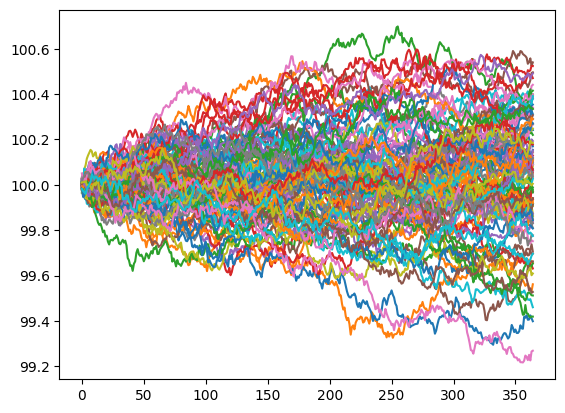

9.245726780566859


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math


class UpandOutBarrierOption:
    def __init__(self, strike, barrier_level):
        self.strike = strike
        self.barrier_level = barrier_level
        self.barrier_trigger = False

    def check_barrier(self, stock_price):
        if stock_price > self.barrier_level:
            self.barrier_trigger = True

    def get_payoff(self, stock_price):
        if not self.barrier_trigger:
            if stock_price > self.strike:
                return stock_price - self.strike
            else:
                return 0
        else:
            return 0



class GeometricBrownianMotion:

    def simulate_paths(self):
        while(self.T - self.dt > 0):
            dWt = np.random.normal(0, math.sqrt(self.dt))  # Brownian motion
            dYt = self.drift*self.dt + self.volatility*dWt  # Change in price
            self.current_price += dYt  # Add the change to the current price
            self.prices.append(self.current_price)  # Append new price to series
            self.T -= self.dt  # Accounting for the step in time

    def __init__(self, initial_price, drift, volatility, dt, T):
        self.current_price = initial_price
        self.initial_price = initial_price
        self.drift = drift
        self.volatility = volatility
        self.dt = dt
        self.T = T
        self.prices = []
        self.simulate_paths()

# Model Parameters
paths = 100
initial_price = 100
drift = .08
volatility = .3
dt = 1/365
T = 1
price_paths = []

# Generate a set of sample paths
for i in range(0, paths):
    price_paths.append(GeometricBrownianMotion(initial_price, drift, volatility, dt, T).prices)

barrier_payoffs = []
risk_free_rate = .01
for price_path in price_paths:
    # Generate new payoff structure for each path
    bc = UpandOutBarrierOption(100, 100.5)
    for price in price_path:
        bc.check_barrier(price)
    barrier_payoffs.append(bc.get_payoff(price_path[-1])/(1 + risk_free_rate))  # We get the last stock price in the series generated by GBM to determin the payoff and discount it by one year

# Plot the set of generated sample paths
for price_path in price_paths:
    plt.plot(price_path)
plt.show()

print(np.average(barrier_payoffs)*100)  # Options are in blocks of 100